In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Dataset .csv')

Task: Top Cuisines

Determine the top three most
common cuisines in the dataset.

In [30]:
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [31]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [32]:
cuisine_count = df['Cuisines'].str.split(', ').explode('Cuisines').value_counts()
print(cuisine_count)
top_cuisine = cuisine_count.head(3)
print("The Top 3 Cuisines are:",top_cuisine)

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64
The Top 3 Cuisines are: Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


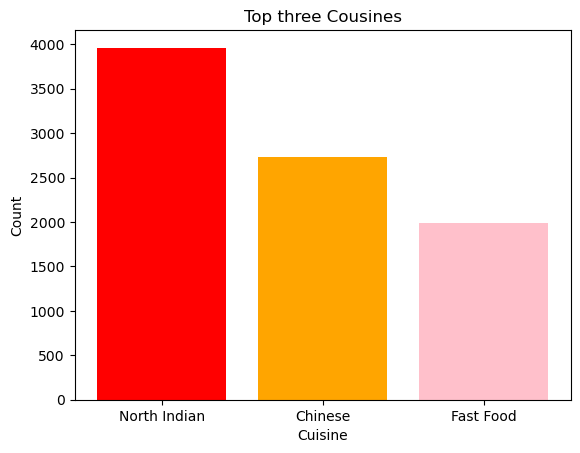

In [33]:
colours = ['red', 'orange', 'pink']
plt.bar(top_cuisine.index, top_cuisine.values, color = colours)
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.title('Top three Cousines')
plt.show()


Calculate the percentage of
restaurants that serve each of the top
cuisines.

In [34]:
total_restaurant = len(df)
print(total_restaurant)
top_cuisine10 = cuisine_count.head()
percentage = (top_cuisine10/total_restaurant) * 100
print("The market share of top 5 Cuisines are:",percentage)

9551
The market share of top 5 Cuisines are: Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


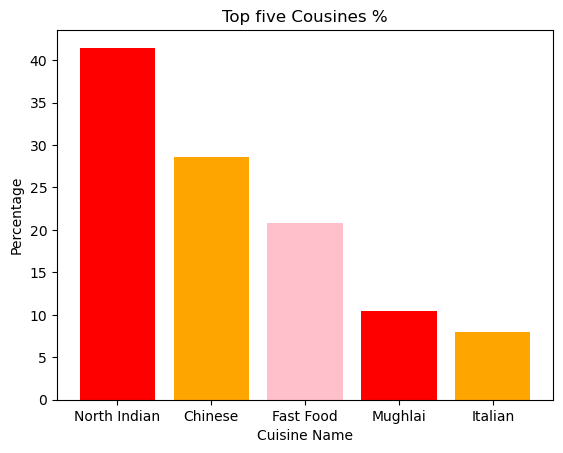

<Figure size 1200x600 with 0 Axes>

In [35]:
plt.bar(top_cuisine10.index, percentage.values, color = colours)
plt.xlabel("Cuisine Name")
plt.ylabel("Percentage")
plt.title('Top five Cousines %')
plt.figure(figsize = (12,6))
plt.show()


Task2: City Analysis

Identify the city with the highest number
of restaurants in the dataset.

In [36]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [37]:
city_count = df['City'].value_counts()
restaurants_no = city_count.head(1)
print("City with the highest number of restaurants:",city_count.idxmax())
print(restaurants_no)

City with the highest number of restaurants: New Delhi
City
New Delhi    5473
Name: count, dtype: int64


Calculate the average rating for
restaurants in each city.

In [38]:
rating_by_each_city = df.groupby("City")['Aggregate rating'].mean()
print("The average Rating of each city:",rating_by_each_city)

The average Rating of each city: City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


Determine the city with the highest
average rating.

In [39]:
top_rated_city = rating_by_each_city.idxmax()
value = rating_by_each_city.max()
print("The city with Highest avg. rating is:",top_rated_city,',','Rating = ',value)

The city with Highest avg. rating is: Inner City , Rating =  4.9


Task3: Price Range Distribution

Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.


In [40]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


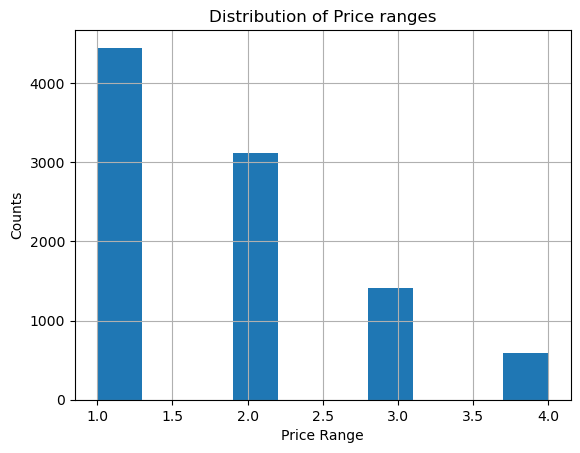

In [41]:
df.hist(column="Price range")
plt.title("Distribution of Price ranges")
plt.xlabel("Price Range")
plt.ylabel("Counts")
plt.show()


Calculate the percentage of restaurants
in each price range category.

In [46]:
price_range_count = df["Price range"].value_counts()
total_restaurant = len(df)
percentage = round((price_range_count/total_restaurant)*100,2)
percentage_m = pd.merge(price_range_count, percentage, on = "Price range")
print("The % of Restaurant in each Price range category are:",percentage_m)

The % of Restaurant in each Price range category are:              count_x  count_y
Price range                  
1               4444    46.53
2               3113    32.59
3               1408    14.74
4                586     6.14


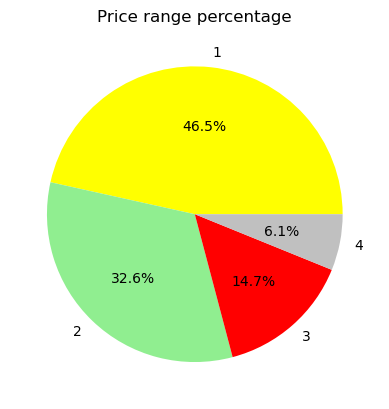

In [47]:
plt.pie(percentage, labels = percentage.index, autopct = "%1.1f%%", colors = ['yellow', 'lightgreen', 'red', 'silver'])
plt.title("Price range percentage")
plt.show()